In [5]:
import sqlite3
import random

# Connect to the database (creates if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Recreate sales table
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

# Sample products and prices
products = {
    "Apples": 2.5,
    "Oranges": 3.0,
    "Bananas": 1.5,
    "Grapes": 4.0,
    "Mangoes": 5.0,
    "Pineapples": 6.0,
    "Strawberries": 4.5,
    "Blueberries": 5.5,
    "Watermelons": 7.0,
    "Papayas": 3.5
}

# Generate 100 random sales records
sales_data = []
for _ in range(100):
    product = random.choice(list(products.keys()))
    quantity = random.randint(1, 20)
    price = products[product]
    sales_data.append((product, quantity, price))

# Insert into table
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()

print("✅ 100 rows inserted into 'sales' table.")


✅ 100 rows inserted into 'sales' table.


In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")
query = "SELECT * FROM sales"
df = pd.read_sql_query(query, conn)
conn.close()

print("📄 Showing all 100 rows from sales table:")
print(df)

# Optional: Save as CSV for reference
df.to_csv("sales_data_export.csv", index=False)


📄 Showing all 100 rows from sales table:
     id       product  quantity  price
0     1   Watermelons        11    7.0
1     2       Oranges         9    3.0
2     3  Strawberries         5    4.5
3     4        Grapes         9    4.0
4     5        Grapes        13    4.0
..  ...           ...       ...    ...
95   96       Oranges         5    3.0
96   97        Grapes        10    4.0
97   98       Papayas        11    3.5
98   99   Blueberries         9    5.5
99  100       Oranges         5    3.0

[100 rows x 4 columns]


📊 Aggregated Sales Summary:
        product  total_qty  revenue
0   Watermelons        150   1050.0
1   Blueberries        129    709.5
2       Papayas        166    581.0
3        Grapes        145    580.0
4       Oranges        160    480.0
5    Pineapples         73    438.0
6        Apples        151    377.5
7       Mangoes         54    270.0
8  Strawberries         55    247.5
9       Bananas         95    142.5


C:\Users\navee\AppData\Local\Temp\ipykernel_8404\2144433418.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product', data=df, palette='viridis')


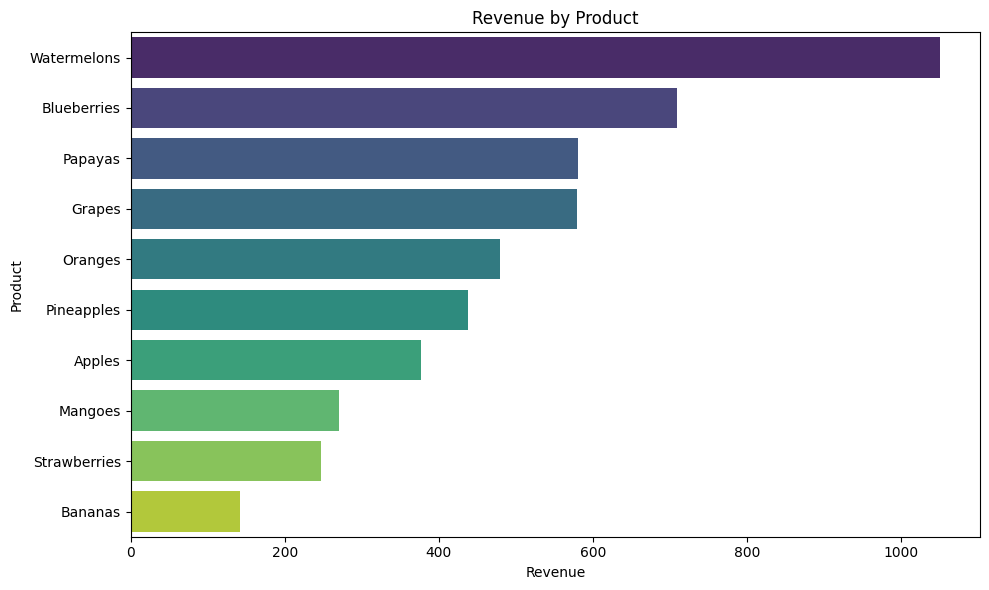

C:\Users\navee\AppData\Local\Temp\ipykernel_8404\2144433418.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_qty', y='product', data=df, palette='Blues')


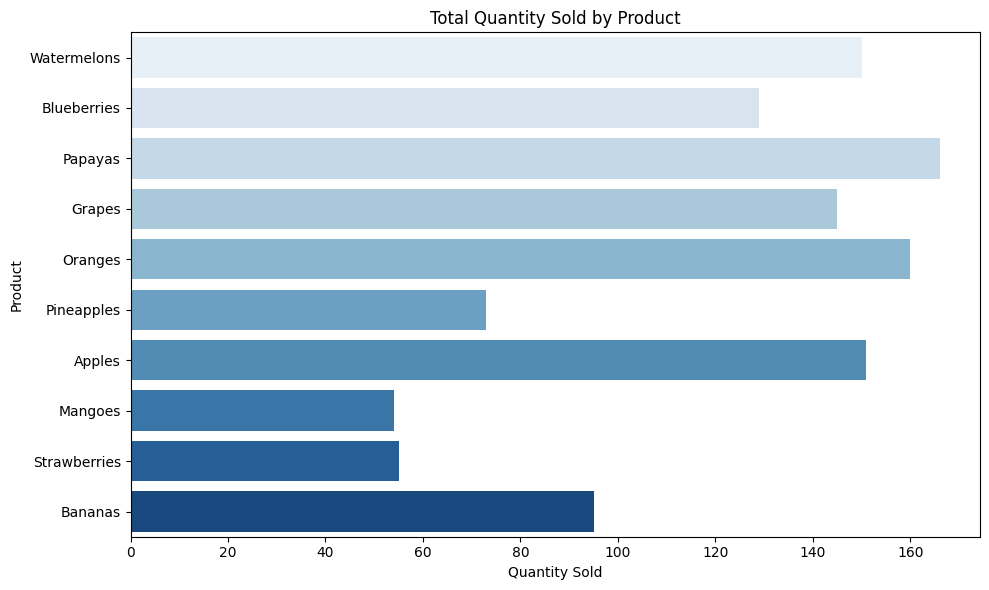

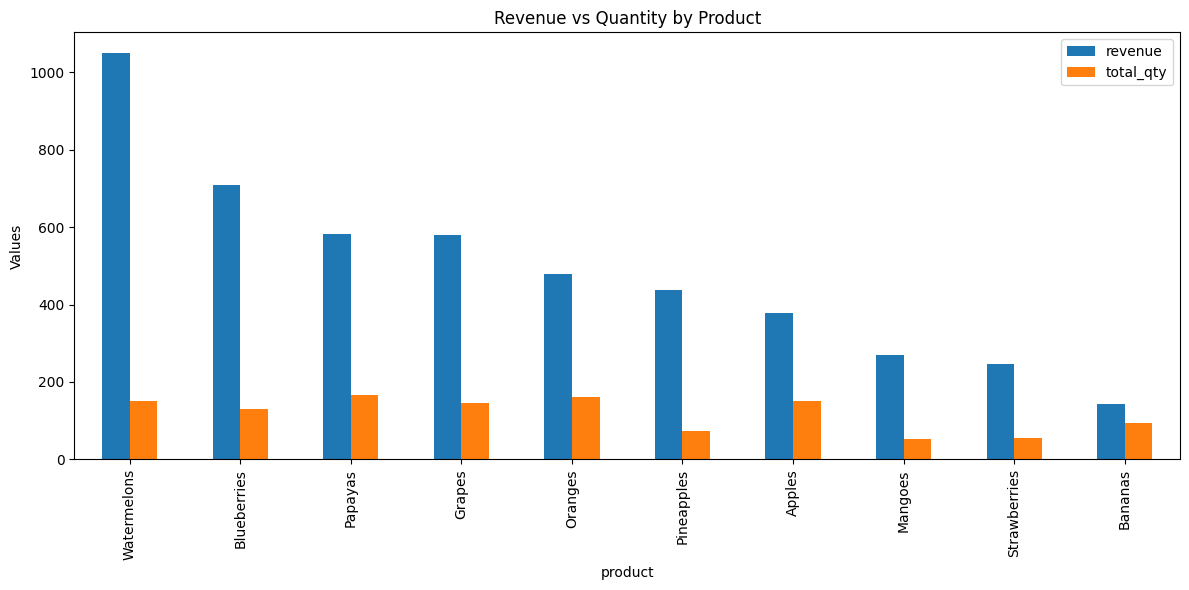

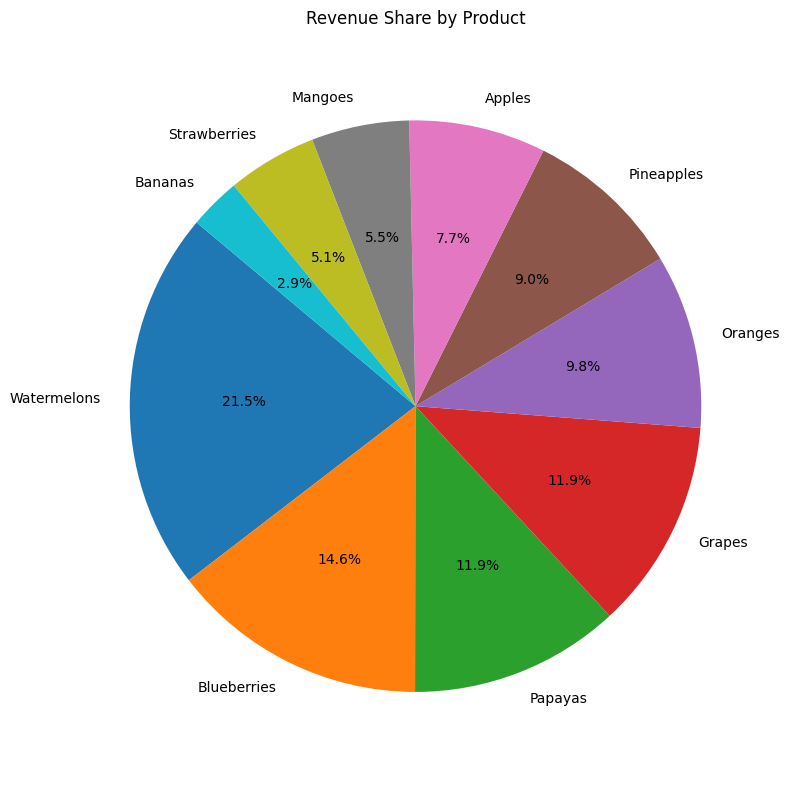

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL: Grouped totals by product
query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        ROUND(SUM(quantity * price), 2) AS revenue 
    FROM sales 
    GROUP BY product
    ORDER BY revenue DESC
"""

df = pd.read_sql_query(query, conn)
conn.close()

print("📊 Aggregated Sales Summary:")
print(df)

# ---------------- Visual 1: Revenue by Product ----------------
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='product', data=df, palette='viridis')
plt.title('Revenue by Product')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig("revenue_by_product.png")
plt.show()

# ---------------- Visual 2: Quantity Sold by Product ----------------
plt.figure(figsize=(10, 6))
sns.barplot(x='total_qty', y='product', data=df, palette='Blues')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig("quantity_by_product.png")
plt.show()

# ---------------- Visual 3: Revenue vs Quantity ----------------
df.set_index('product')[['revenue', 'total_qty']].plot(kind='bar', figsize=(12, 6))
plt.title("Revenue vs Quantity by Product")
plt.ylabel("Values")
plt.tight_layout()
plt.savefig("revenue_vs_quantity.png")
plt.show()

# ---------------- Visual 4: Revenue Share Pie Chart ----------------
plt.figure(figsize=(8, 8))
plt.pie(df['revenue'], labels=df['product'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product")
plt.axis('equal')
plt.tight_layout()
plt.savefig("revenue_share_pie.png")
plt.show()
